## Testing and Debugging the BPASS isochrone at 10^9 years age.
In this BPASS isochrone and cluster plot, I go over the BPASS isochrone for 1 billion years age, 0.1solar metallicity, AKs=0.0, and distance of 1000 parsecs from Earth. From the isochrone and cluster, we discuss several plots such as the log_g frequency distribution of the isochrone, the color magnitude diagram (B-V vs M_V), and the current-mass luminosity relationship of the cluster.

For a sanity check, we can see that the primaries, secondaries, and single stars have phasees of 5 or of 101 or 110 (for the case of compact remnant primary from secondary star models). This is since we haven't identified neutron stars or black holes yet. Also, stars with phase of -99 do exist, and those are the secondary stars that have already merged.

## This is for tutorial as well as debugging and demonstration purposes.

In [1]:
import spisea
from spisea import evolution, synthetic
import math
# Check if the evolution class works fine
import time
t1=time.time()
bps=evolution.BPASS()
iso1=synthetic.Isochrone_Binary(9.0, 0.0, 100,math.log10(1/10), mass_sampling=1, filepath='/g/lu/scratch/ryotainagaki/BPASS_iso_filesTimedIsolated/')

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/locations.py:346: UserWarning: Extinction files not found in /g/lu/models/cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/refs.py:125: UserWarning: No thermal tables found, no thermal calculations can be performed. No files found for /g/lu/models/cdbs/mtab/*_tmt.fits
  'no thermal calculations can be performed. ' + str(e))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/u/ryotainagaki/Desktop/PyPopStar/spisea/evolution.py:1802: RuntimeWarning: overflow encountered in power
  (1 / cs.au) * un.m)
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = geta

Changing to logg=5.00 for T= 31808 logg=8.00
Changing to logg=5.00 for T= 31822 logg=8.00
Changing to logg=5.00 for T= 31822 logg=8.00
Changing to logg=5.00 for T= 31822 logg=8.00
Changing to logg=5.00 for T= 31822 logg=8.00
Changing to logg=5.00 for T= 31786 logg=8.00
Changing to logg=5.00 for T= 24130 logg=5.67
Changing to logg=5.00 for T= 18944 logg=5.21
Changing to logg=5.00 for T= 25829 logg=6.01
Changing to logg=5.00 for T= 24127 logg=5.39
Changing to logg=5.00 for T= 24970 logg=5.77
Changing to logg=5.00 for T= 25764 logg=5.90
Changing to logg=5.00 for T= 25621 logg=5.91
Changing to logg=5.00 for T= 27695 logg=5.91
Changing to logg=5.00 for T= 20295 logg=5.48
Changing to logg=5.00 for T= 31822 logg=8.00
Changing to logg=5.00 for T= 29292 logg=8.01
Changing to logg=5.00 for T= 26557 logg=5.76
Changing to logg=5.00 for T= 31822 logg=8.00
Changing to logg=5.00 for T= 38896 logg=6.02
Changing to logg=5.00 for T= 31822 logg=8.00
Changing to logg=5.00 for T= 43334 logg=6.20
Changing t

M =   1.140 Msun  T =  7291 K  m_ubv_U = 8.74
Primaries
M =   3.981 Msun  T =   nan K  m_ubv_U =  nan
M =   1.400 Msun  T =   nan K  m_ubv_U =  nan
M =   0.316 Msun  T =   nan K  m_ubv_U =  nan
M =   1.100 Msun  T =  7045 K  m_ubv_U = 8.94
M =   0.900 Msun  T =  6174 K  m_ubv_U = 10.16
M =   3.700 Msun  T =  9893 K  m_ubv_U = 17.50
M =   2.100 Msun  T =  9820 K  m_ubv_U = 17.28
M =   1.259 Msun  T =   nan K  m_ubv_U =  nan
M =   2.100 Msun  T =  6000 K  m_ubv_U = 3.15
M =   1.300 Msun  T =  8321 K  m_ubv_U = 7.98
M =   3.000 Msun  T =  9943 K  m_ubv_U = 17.26
M =   0.631 Msun  T =   nan K  m_ubv_U =  nan
M =   1.700 Msun  T =  9307 K  m_ubv_U = 6.41
M =   5.012 Msun  T =  3090 K  m_ubv_U = 21.74
M =   2.100 Msun  T = 10212 K  m_ubv_U = 17.22
M =   1.100 Msun  T =  7042 K  m_ubv_U = 8.94
M =   3.200 Msun  T = 12325 K  m_ubv_U = 16.59
M =   2.100 Msun  T = 14320 K  m_ubv_U = 15.35
M =   0.316 Msun  T =   nan K  m_ubv_U =  nan
M =   0.398 Msun  T =   nan K  m_ubv_U =  nan
M =   1.800 Msun

M =   3.600 Msun  T = 15352 K  m_ubv_V = 4.28
M =   3.330 Msun  T = 14655 K  m_ubv_V = 4.49
M =   6.500 Msun  T = 13004 K  m_ubv_V = 17.55
M =   0.690 Msun  T =   nan K  m_ubv_V =  nan
M =   1.140 Msun  T =  7217 K  m_ubv_V = 8.73
M =   1.700 Msun  T =  9251 K  m_ubv_V = 6.43
M =   2.300 Msun  T = 10624 K  m_ubv_V = 17.12
M =   3.200 Msun  T =  8476 K  m_ubv_V = 8.60
M =   0.480 Msun  T =  4122 K  m_ubv_V = 13.70
M =   3.000 Msun  T = 13134 K  m_ubv_V = 4.30
M =   2.100 Msun  T =  9043 K  m_ubv_V = 5.21
M =   0.200 Msun  T =  3668 K  m_ubv_V = 16.00
M =   2.560 Msun  T = 12452 K  m_ubv_V = 5.39
M =   3.000 Msun  T = 11832 K  m_ubv_V = 17.33
M =   1.890 Msun  T =  8040 K  m_ubv_V = 5.87
M =   1.300 Msun  T =  8310 K  m_ubv_V = 7.99
M =   2.070 Msun  T = 10353 K  m_ubv_V = 5.83
M =   2.070 Msun  T = 10778 K  m_ubv_V = 5.88
M =   0.680 Msun  T =  3924 K  m_ubv_V = 12.63
M =   1.900 Msun  T =  5244 K  m_ubv_V = 5.18
M =   2.800 Msun  T = 14382 K  m_ubv_V = 5.40
Starting filter: ubv,B   Ela

M =   0.880 Msun  T =  5078 K  m_ubv_R = 10.25
M =   0.180 Msun  T =  3624 K  m_ubv_R = 15.51
M =   2.220 Msun  T = 12755 K  m_ubv_R = 6.36
M =   0.420 Msun  T =   nan K  m_ubv_R =  nan
M =   2.700 Msun  T =  9496 K  m_ubv_R = 17.68
M =   1.680 Msun  T =  9280 K  m_ubv_R = 6.62
M =   0.130 Msun  T =  3424 K  m_ubv_R = 16.55
M =   2.100 Msun  T = 12328 K  m_ubv_R = 6.41
M =   1.500 Msun  T =  9188 K  m_ubv_R = 7.07
M =   0.850 Msun  T =  4905 K  m_ubv_R = 10.46
M =   3.000 Msun  T =  8683 K  m_ubv_R = 17.70
M =   0.630 Msun  T =   nan K  m_ubv_R =  nan
M =   0.220 Msun  T =  3700 K  m_ubv_R = 15.04
M =   2.240 Msun  T = 10658 K  m_ubv_R = 5.05
M =   1.050 Msun  T =  6724 K  m_ubv_R = 8.90
M =   2.300 Msun  T = 10608 K  m_ubv_R = 17.03
M =   3.700 Msun  T =  7820 K  m_ubv_R = 17.98
M =   0.540 Msun  T =   nan K  m_ubv_R =  nan
M =   0.230 Msun  T =   nan K  m_ubv_R =  nan
M =   6.000 Msun  T = 12079 K  m_ubv_R = 17.61
M =   4.000 Msun  T = 12600 K  m_ubv_R = 3.05
M =   4.000 Msun  T = 10

As a sanity check, I would like to make sure thatk, for primary stars, we only have (from the isochrone) designated phase 5 stars ( anything that is not a compact remnant), white dwarves (101), and non-white dwarf compact remnants that are NEWSECMODS primaries (110). Also make sure that our secondary stars are non-compact-remnant, white dwarves, or are merged. Secondary stars that have merged with their primaries have designation of phase -99.

In [2]:
import numpy as np
np.all([(x==5 or x==101 or x==110 or x==-99) for x in iso1.primaries['phase']])

True

In [3]:
np.all([(x==5 or x==101 or x==110 or x==-99) for x in iso1.singles['phase']])

True

In [4]:
np.all([(x==5 or x==101 or x==-99 or x==110) for x in iso1.secondaries['phase']])

True

Find the maximum, mean, and median  values of logg (cgs) for primaries, single stars, and secondaries by looking at the singles, primaries, and secondaries attributes (here tables) of the isochorne.

In [5]:
import numpy as np
np.max(iso1.singles['logg'])

9.294221355125417

In [6]:
import numpy as np
np.max(np.nan_to_num(iso1.primaries['logg'], -np.inf))

9.294221355125417

In [7]:
np.max(np.nan_to_num(iso1.secondaries['logg'], -np.inf))

9.294186013434684

In [8]:
np.mean(iso1.singles['logg'][np.where(~np.isnan(iso1.singles['logg']))])

5.953600902940846

In [9]:
np.mean(iso1.primaries['logg'][np.where(~np.isnan(iso1.primaries['logg']))])

6.774201431135537

In [10]:
np.mean(iso1.secondaries['logg'][np.where(~np.isnan(iso1.secondaries['logg']))])

5.292267279955646

In [11]:
np.median(iso1.singles['logg'][np.where(~np.isnan(iso1.singles['logg']))])

4.551726078546701

In [12]:
np.median(iso1.primaries['logg'][np.where(~np.isnan(iso1.primaries['logg']))])

8.124140411455203

In [13]:
np.median([x for x in iso1.secondaries['logg'] if np.isfinite(x)])

4.472385193454187

This is due to unclassified compact remnant primaries from NEWSECMODS type models

In [14]:
iso1.primaries['logg']

nan
8.479802314491101
8.51798068610406
8.45079445503826
nan
nan
nan
8.106174186534371
nan
nan
4.519790136742458


Text(0.5, 0, 'logg in cgs')

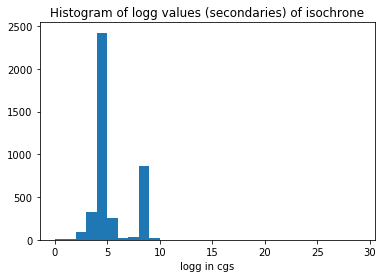

In [15]:
import matplotlib.pyplot as plt
plt.title("Histogram of logg values (secondaries) of isochrone")
plt.hist(np.array([x for x in iso1.secondaries['logg'] if np.isfinite(x)]), np.arange(0, 30, 1))
plt.xlabel("logg in cgs")

Text(0.5, 0, 'logg in cgs')

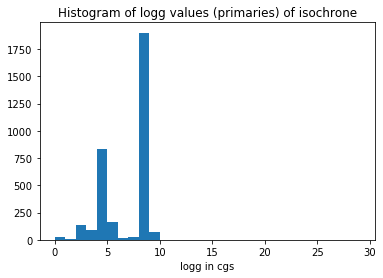

In [16]:
import matplotlib.pyplot as plt
plt.title("Histogram of logg values (primaries) of isochrone")
plt.hist(np.array([x for x in iso1.primaries['logg'] if np.isfinite(x)]), np.arange(0, 30, 1))
plt.xlabel("logg in cgs")

Text(0.5, 0, 'logg in cgs')

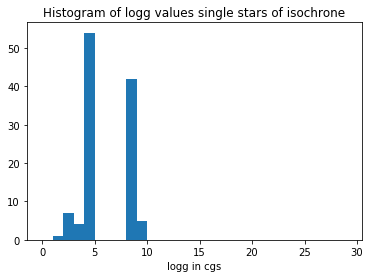

In [17]:
import matplotlib.pyplot as plt
plt.title("Histogram of logg values single stars of isochrone")
plt.hist(np.array([x for x in iso1.singles['logg'] if np.isfinite(x)]), np.arange(0, 30, 1))
plt.xlabel("logg in cgs")

Now we examine the phase of the upper lefthand corner of the CMD, which could be full of WR stars.
Note that unlike the IsochronePhot, there are three tables that hold the most important data in the isochrone: singles, primaries, and secondaries attributes.

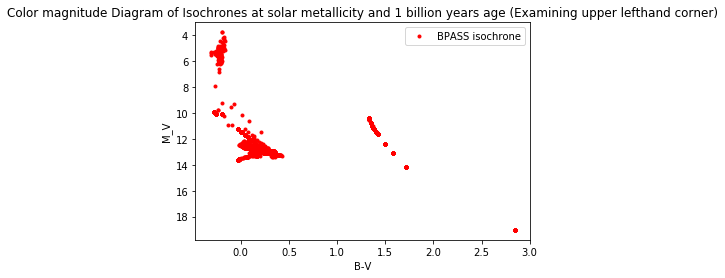

In [18]:
import matplotlib.pyplot as plt
indices1= np.where(iso1.singles['logg']>5)[0]
indices2= np.where(iso1.primaries['logg']>5)[0]
indices3= np.where(iso1.secondaries['logg']>5)[0]
plt.plot(iso1.primaries['m_ubv_B'][indices2]-iso1.primaries["m_ubv_V"][indices2], iso1.primaries["m_ubv_V"][indices2]-5*np.log10(10), "r.")
plt.plot(iso1.secondaries['m_ubv_B'][indices3]-iso1.secondaries["m_ubv_V"][indices3], iso1.secondaries["m_ubv_V"][indices3]-5*np.log10(10), "r.")
plt.plot(iso1.singles['m_ubv_B'][indices1]-iso1.singles["m_ubv_V"][indices1], iso1.singles["m_ubv_V"][indices1]-5*np.log10(10), "r.", label="BPASS isochrone")
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of Isochrones at solar metallicity and 1 billion years age (Examining upper lefthand corner)")
plt.gca().invert_yaxis()
plt.legend()

Examining the potential location of caluse of a vertical line in the upper left hand corner of the plot.

In [19]:
indices2= np.where((iso1.primaries['logg']>5) & (iso1.primaries['m_ubv_B']-iso1.primaries['m_ubv_V']>-0.4) & (iso1.primaries['m_ubv_B']-iso1.primaries['m_ubv_V']<-0.2))[0]

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in less
  result = getattr(super(), op)(other)


In [20]:
np.unique(iso1.primaries[indices2]['phase'])

5.0
101.0


The previous kind of shows that there may need to be more work done on identifying when white dwarves are. There should be tons of them in the lower lefthand corner of the CMD. That is an issue I may need to fix.
The following is another look at the CMD of the isochrone, but of only the secondary stars.

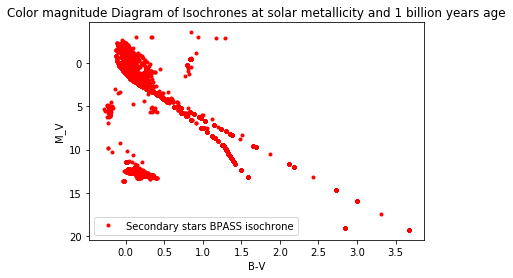

In [21]:
import matplotlib.pyplot as plt
plt.plot(iso1.secondaries['m_ubv_B']-iso1.secondaries["m_ubv_V"], iso1.secondaries["m_ubv_V"]-5*np.log10(10), "r.", label="Secondary stars BPASS isochrone")
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of Isochrones at solar metallicity and 1 billion years age")
plt.gca().invert_yaxis()
plt.legend()

For comparison, let's create a MIST v.1. isochrone  phot using otherwise same parameters.

In [22]:
iso2=synthetic.IsochronePhot(9.0, 0.0, 100, math.log10(1/10), recomp=True) # New MIST v.1 isochrone for same metallicity

Isochrone generation took 76.879329 s.
Making photometry for isochrone: log(t) = 9.00  AKs = 0.00  dist = 100
     Starting at:  2021-01-07 23:28:13.226036   Usually takes ~5 minutes
Starting filter: ubv,U   Elapsed time: 0.00 seconds
Starting synthetic photometry
M =   0.104 Msun  T =  3384 K  m_ubv_U = 21.55
M =   0.781 Msun  T =  5867 K  m_ubv_U = 11.01
M =   1.713 Msun  T =  9508 K  m_ubv_U = 6.29
M =   1.744 Msun  T =  6165 K  m_ubv_U = 6.22
M =   1.790 Msun  T =  4388 K  m_ubv_U = 5.07
M =   1.903 Msun  T =  5179 K  m_ubv_U = 5.56
M =   1.911 Msun  T =  4438 K  m_ubv_U = 4.91
M =   1.912 Msun  T =  3995 K  m_ubv_U = 5.21
M =   1.912 Msun  T =  3811 K  m_ubv_U = 5.52
M =   1.913 Msun  T =  3716 K  m_ubv_U = 5.79
M =   1.913 Msun  T =  3729 K  m_ubv_U = 5.92
M =   1.913 Msun  T =  4901 K  m_ubv_U = 1.46
M =   1.913 Msun  T = 53895 K  m_ubv_U = 3.26
M =   1.913 Msun  T = 90166 K  m_ubv_U = 10.50
Starting filter: ubv,B   Elapsed time: 3.22 seconds
Starting synthetic photometry
M =   

Looking at the distribution of logg values. for the stars in the MISTv.1 isochrone.

In [23]:
np.max(iso2.points['logg'])

7.941465338001905

(array([505., 146., 198.,  93., 229.,  66.,  24., 123.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 29 Patch objects>)

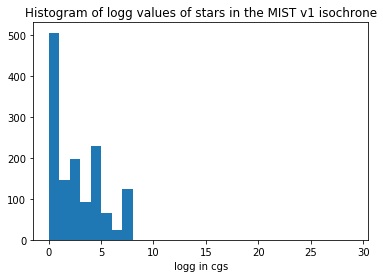

In [24]:
import matplotlib.pyplot as plt
plt.xlabel("logg in cgs")
plt.title("Histogram of logg values of stars in the MIST v1 isochrone")
plt.hist(np.array([x for x in iso2.points['logg'] if np.isfinite(x)]), np.arange(0, 30, 1))

In [25]:
np.median(iso2.points['logg'])

2.1703298385098044

In [26]:
np.mean(iso2.points['logg'])

2.6426943829275906

In [27]:
from spisea import imf
from spisea.imf import imf, multiplicity
from spisea import ifmr


Make the clusters corresponding to the binary star isochrone and the MISTv.1 isochrone

In [32]:
clus_1=synthetic.Cluster_w_Binaries(iso1, imf.IMFSalpeter1955(multiplicity=multiplicity.MultiplicityResolvedDK()), 2000, ifmr=ifmr.IFMR_Spera15())
clus_2=synthetic.ResolvedCluster(iso2, imf.IMFSalpeter1955(multiplicity=multiplicity.MultiplicityResolvedDK()), 2000, ifmr=ifmr.IFMR_Spera15())

116 star systems had to be deleted
121 companions had to be deleted
Found 54 companions out of stellar mass range


/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in greater_equal
  result = getattr(super(), op)(other)


Now let's visualize the isochrone we have created so far with a color magnitude diagram. There we can see the end of main sequence.

**Remember to apply the distance modulus. (Dist to cluster=100 pc)**

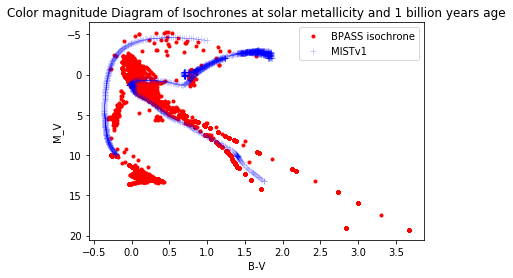

In [33]:
# Taking a look at the Binary Cluster vs Default Settings cluster Observer's HR Diagram
# Remember to use a distance modulus!
import matplotlib.pyplot as plt
plt.plot(iso1.primaries['m_ubv_B']-iso1.primaries["m_ubv_V"], iso1.primaries["m_ubv_V"]-5*np.log10(100/10), "r.")
plt.plot(iso1.secondaries['m_ubv_B']-iso1.secondaries["m_ubv_V"], iso1.secondaries["m_ubv_V"]-5*np.log10(100/10), "r.")
plt.plot(iso1.singles['m_ubv_B']-iso1.singles["m_ubv_V"], iso1.singles["m_ubv_V"]-5*np.log10(100/10), "r.", label="BPASS isochrone")
plt.plot(iso2.points['m_ubv_B']-iso2.points["m_ubv_V"], iso2.points["m_ubv_V"]-5*np.log10(100/10), "b+", label="MISTv1", alpha = 0.2)
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of Isochrones at solar metallicity and 1 billion years age")
plt.gca().invert_yaxis()
plt.legend()

We do have several outliers but otherwise the pattern does not seem too terribly off from the MISTv.1 isochrone's shape. Now I look at the primary stars and see if there are any problems caused.

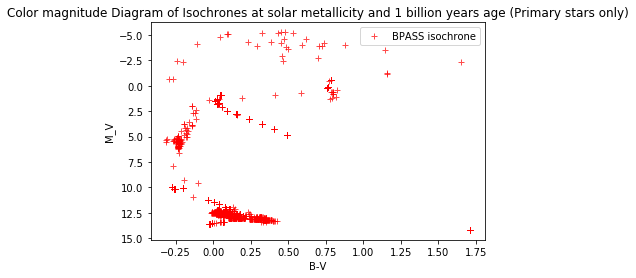

In [34]:
# Taking a look at the Binary Cluster vs Default Settings cluster Observer's HR Diagram
# Remember to use a distance modulus!
import matplotlib.pyplot as plt
plt.plot(iso1.primaries['m_ubv_B']-iso1.primaries["m_ubv_V"], iso1.primaries["m_ubv_V"]-5*np.log10(10), "r+",  label="BPASS isochrone", alpha =0.7)
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of Isochrones at solar metallicity and 1 billion years age (Primary stars only)")
plt.gca().invert_yaxis()
plt.legend()

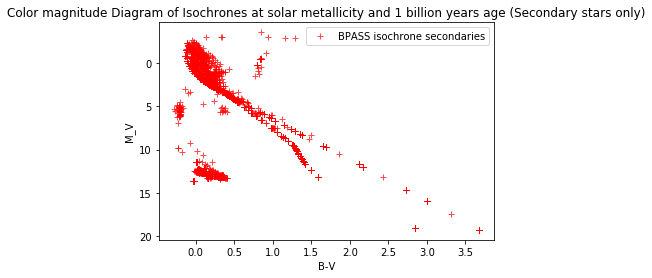

In [35]:
# Color magnitude Diagram of secondary stars in the BPASS isochorne
import matplotlib.pyplot as plt
plt.plot(iso1.secondaries['m_ubv_B']-iso1.secondaries["m_ubv_V"], iso1.secondaries["m_ubv_V"]-5*np.log10(10), "r+",  label="BPASS isochrone secondaries", alpha =0.7)
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of Isochrones at solar metallicity and 1 billion years age (Secondary stars only)")
plt.gca().invert_yaxis()
plt.legend()

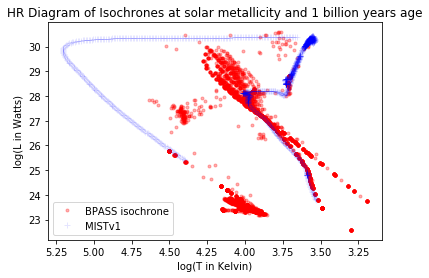

In [36]:
import matplotlib.pyplot as plt
plt.plot(np.log10(iso1.primaries['Teff']), np.log10(iso1.primaries["L"]), "r.", alpha =0.3)
plt.plot(np.log10(iso1.secondaries['Teff']), np.log10(iso1.secondaries["L"]), "r.", alpha =0.3)
plt.plot(np.log10(iso1.singles['Teff']), np.log10(iso1.singles["L"]), "r.", label="BPASS isochrone", alpha =0.3)
plt.plot(np.log10(iso2.points['Teff']), np.log10(iso2.points["L"]), "b+", label="MISTv1", alpha =0.1)
plt.xlabel("log(T in Kelvin)")
plt.ylabel("log(L in Watts)")
plt.title("HR Diagram of Isochrones at solar metallicity and 1 billion years age")
plt.gca().invert_xaxis()
plt.legend()
# Rough pattern seems to fit. What's that line?

A good sign here is that there are plenty of compact remnant (that means good number of stars have gone through their main-sequence and post-main sequence). I also notice stars turning to the red giant branch. This is going to be really important when we decide to use the clusters as reference for finding ages of actual star clusters.

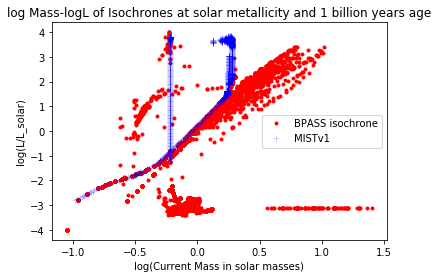

In [37]:
# Plot the mass-luminosity relationship
from astropy import constants as cs
import matplotlib.pyplot as plt
plt.plot(np.log10(iso1.primaries['mass_current']), np.log10(iso1.primaries["L"]/cs.L_sun), "r.")
plt.plot(np.log10(iso1.secondaries['mass_current']), np.log10(iso1.secondaries["L"]/cs.L_sun), "r.")
plt.plot(np.log10(iso1.singles['mass_current']), np.log10(iso1.singles["L"]/cs.L_sun), "r.", label="BPASS isochrone")
plt.plot(np.log10(iso2.points['mass_current']), np.log10(iso2.points["L"]/cs.L_sun), "b+", label="MISTv1", alpha =0.2)
plt.xlabel("log(Current Mass in solar masses)")
plt.ylabel("log(L/L_solar)")
plt.title("log Mass-logL of Isochrones at solar metallicity and 1 billion years age")
plt.legend()
# Rough pattern seems to fit. What's that line?

Which table is causing that line segment at around log10(L/L_sun)=-3?
Let's find out.

Examining the primaries in the isochrone.

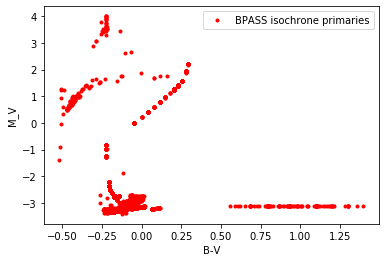

In [38]:
from astropy import constants as cs
import matplotlib.pyplot as plt
plt.plot(np.log10(iso1.primaries['mass_current']), np.log10(iso1.primaries["L"]/cs.L_sun), "r.", label="BPASS isochrone primaries")
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.legend()

Which type of primary star, if any, is it that is causing this strange pattern that is a clump at the bottom of the plot? Let's look at the bad region at around star luminosity = about $10^{-3.2}$ solar luminosities

In [39]:
bad_line = iso1.primaries[np.where((np.log10(iso1.primaries["L"]/cs.L_sun)>-3.30) & (np.log10(iso1.primaries["L"]/cs.L_sun)<-3.10))[0]]

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in greater
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in less
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [40]:
bad_line

mass,L,Teff,R,logg,isWR,mass_current,phase,source,m_ubv_U,m_ubv_V,m_ubv_B,m_ubv_R,m_ubv_I
solMass,W,K,m,,,solMass,,,,,,,
float64,float64,float64,float64,float64,bool,float64,float64,int64,float64,float64,float64,float64,float64
3.5,2.4907660018164023e+23,9672.283111329129,6319717.486352178,8.479802314491101,False,0.90842,101.0,1,17.53563757420806,18.03865661686814,18.22222227032181,17.91170632075815,17.812211500853806
2.7,2.557966951129601e+23,9887.192732391351,6129014.717567,8.51798068610406,False,0.93293,101.0,1,17.503841600764748,18.036048317173435,18.204639640691756,17.916499716592714,17.82835070578595
3.7,2.07178139692315e+23,8460.440976546977,7533124.832037322,8.247259324192,False,0.75561,101.0,1,17.798538097507702,18.106250763853,18.38991687324541,17.929501604847232,17.75359698658008
4.0,2.6873048077097104e+23,10324.000098134375,5761713.565581131,8.593080016498233,False,0.9801,101.0,1,17.450273956287816,18.037684182151715,18.177943832181203,17.932107405774683,17.86537052005745
2.3,2.70260097498769e+23,10377.984076547742,5718131.837131388,8.602141571868392,False,0.98568,101.0,1,17.444604917912322,18.03848105798149,18.17542137112662,17.93453851468626,17.870305815761817
3.2,2.3884652611627444e+23,9358.214598021681,6610931.607086639,8.42246062660085,False,0.87111,101.0,1,17.589308405790437,18.04701109176309,18.253818214343923,17.908548665599973,17.79140266147752
5.0,2.326692174218708e+23,11660.65644419758,4202547.823168389,8.94465957655051,False,1.17158,101.0,1,17.644315665478466,18.37239157825426,18.440395541598697,18.302268116814552,18.28985445518892
3.2,2.3636759105725983e+23,8153.254521901935,8664054.275141694,8.042911655025577,False,0.62437,101.0,1,17.68756644952792,17.935675836471333,18.249854243809608,17.743631982272564,17.54422532645314


What sorts of characteristics (logg, Teff, L) can be causing it? Let's find out

In [41]:
np.unique(bad_line['L'])

1.932657645409718e+23
1.933071549832596e+23
1.933730419228513e+23
1.9696766164912036e+23
1.971455275513081e+23
1.971509749588011e+23
1.971868408155623e+23
1.972195343681304e+23
1.9738990094566536e+23
1.9739262800676395e+23
1.9757087766242637e+23


In [42]:
np.unique(bad_line['Teff'])

7779.111564701878
7796.864737380966
7811.294287661608
7814.010671501809
7814.154612223462
7827.913176062374
7841.822359149005
7879.596887948426
7903.746454437324
7906.913723362877
7918.2826461182785


In [43]:
np.unique(bad_line['logg'])

7.961309494515844
7.965267176083383
7.968481691734051
7.969083630818839
7.969116622516238
7.972172177423601
7.9752583240669495
7.983603421937711
7.988921506302239
7.989615875881896
7.992110732749521


In [44]:
np.unique(bad_line['mass'])

1.4
1.6
1.7
1.8
1.9
2.1
2.3
2.7
3.0
3.2
3.5


In [45]:
np.unique(bad_line['phase'])

101.0


**It turns out that the line was caused by some compact remnants that were lingering around from the NEWSECMODS. In future versions of the stellar evolution model, I may obtain an additional program from the BPASS creators to match the types of compact remnants from the NEWSECMODS.**

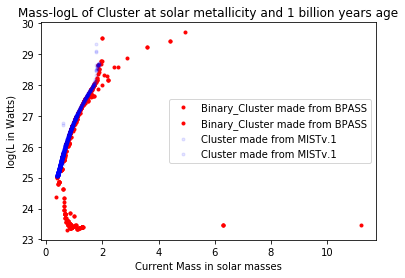

In [46]:
# Plot the mass-luminosity relationship
from astropy import constants as cs
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt
plt.plot((clus_1.star_systems['mass_current']), np.log10(clus_1.star_systems["L"]), "r.", label="Binary_Cluster made from BPASS", alpha =1)
plt.plot((clus_1.companions['mass_current']), np.log10(clus_1.companions["L"]), "r.", label="Binary_Cluster made from BPASS", alpha = 1)
plt.plot((clus_2.star_systems['mass_current']), np.log10(clus_2.star_systems["L"]), "b.", label="Cluster made from MISTv.1", alpha =0.1)
plt.plot((clus_2.companions['mass_current']), np.log10(clus_2.companions["L"]), "b.", label="Cluster made from MISTv.1", alpha = 0.1)
plt.xlabel("Current Mass in solar masses")
plt.ylabel("log(L in Watts)")
plt.title("Mass-logL of Cluster at solar metallicity and 1 billion years age")
plt.legend()
# Rough pattern seems to fit. What's that line?

Where is that hook coming from?

In [47]:
np.unique(iso1.primaries[np.where(np.log10(iso1.primaries["L"])<=25)]['phase'])

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in less_equal
  result = getattr(super(), op)(other)


101.0


In [48]:
len(iso1.primaries[np.where((np.log10(iso1.primaries["L"])<=25) & (iso1.primaries["phase"]==110))])

0

In [49]:
len(iso1.primaries[np.where((np.log10(iso1.primaries["L"])<=25) & (iso1.primaries["phase"]==101))])

1983

OK. It makes sense that our compact remnants are causing this. (Remember, there really is no significant fusion in the insides of neutron stars or white dwarves.

Plot the mass-luminosity relationship of the binary_cluster

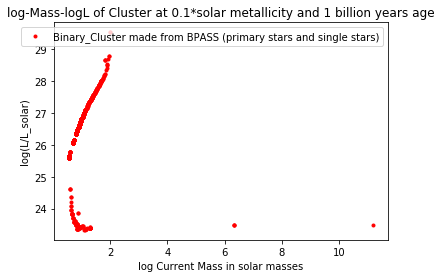

In [50]:
from astropy import constants as cs
from astropy import units as u
import matplotlib.pyplot as plt
plt.plot(clus_1.star_systems['mass_current'], np.log10(clus_1.star_systems["L"]), "r.", label="Binary_Cluster made from BPASS (primary stars and single stars)", alpha =1)
plt.xlabel("log Current Mass in solar masses")
plt.ylabel("log(L/L_solar)")
plt.title("log-Mass-logL of Cluster at 0.1*solar metallicity and 1 billion years age")
plt.legend()
# Rough pattern seems to fit. What's that line?

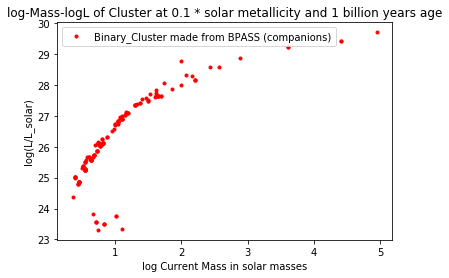

In [51]:
# Plot the mass-luminosity relationship
from astropy import constants as cs
from astropy import units as u
import matplotlib.pyplot as plt
plt.plot(clus_1.companions['mass_current'], np.log10(clus_1.companions["L"]), "r.", label="Binary_Cluster made from BPASS (companions)", alpha =1)
plt.xlabel("log Current Mass in solar masses")
plt.ylabel("log(L/L_solar)")
plt.title("log-Mass-logL of Cluster at 0.1 * solar metallicity and 1 billion years age")
plt.legend()
# Rough pattern seems to fit. What's that line?

Aha, it looks like the companions are causing this! and these are probably the 110 and 101 phased stars. Otherwise I like the alignment

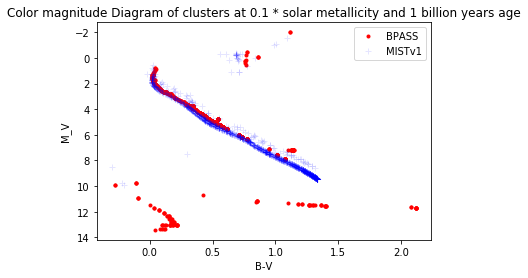

In [52]:
# Taking a look at the Binary Cluster vs Default Settings cluster Observer's HR Diagram
# Remember to use a distance modulus!
import matplotlib.pyplot as plt
plt.plot(clus_1.star_systems['m_ubv_B']-clus_1.star_systems["m_ubv_V"], clus_1.star_systems["m_ubv_V"]-5*np.log10(10), "r.",label="BPASS")
plt.plot(clus_2.star_systems['m_ubv_B']-clus_2.star_systems["m_ubv_V"], clus_2.star_systems["m_ubv_V"]-5*np.log10(10), "b+", label="MISTv1", alpha=0.1)
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of clusters at 0.1 * solar metallicity and 1 billion years age")
plt.gca().invert_yaxis()
plt.legend()

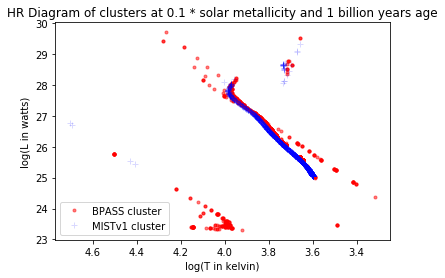

In [53]:
import matplotlib.pyplot as plt
plt.plot(np.log10(clus_1.companions['Teff']), np.log10(clus_1.companions["L"]), "r.",label="BPASS cluster", alpha=0.5)
plt.plot(np.log10(clus_2.companions['Teff']), np.log10(clus_2.companions["L"]), "b+", alpha=0.15)
plt.plot(np.log10(clus_1.star_systems['Teff']), np.log10(clus_1.star_systems["L"]), "r.", alpha=0.5)
plt.plot(np.log10(clus_2.star_systems['Teff']), np.log10(clus_2.star_systems["L"]), "b+", label="MISTv1 cluster", alpha=0.15)
plt.xlabel("log(T in kelvin)")
plt.ylabel("log(L in watts)")
plt.title("HR Diagram of clusters at 0.1 * solar metallicity and 1 billion years age")
plt.gca().invert_xaxis()
plt.legend()

Looking at which stars are the white dwarves?

In [54]:
import numpy as np
np.where(clus_1.star_systems['phase']==101.0)[0]

array([  2,   3,   4,   5,  10,  13,  14,  16,  18,  19,  20,  24,  26,
        31,  33,  34,  35,  40,  45,  46,  48,  49,  51,  52,  53,  55,
        57,  61,  63,  65,  66,  68,  71,  73,  75,  77,  78,  79,  81,
        83,  84,  87,  88,  89,  90,  91,  93,  94,  97, 101, 102, 104,
       105, 107, 108, 111, 113, 114, 116, 120, 125, 126, 127, 131, 134,
       135, 138, 156, 174, 190, 219, 253, 262, 264, 275, 294, 296, 298,
       316, 355, 366, 369, 381, 389, 441, 444, 453, 465, 501, 510, 520,
       528, 531, 534, 541, 545, 597, 627, 662, 676, 683, 690, 708, 718,
       725, 734, 757, 771, 783, 797, 805, 812, 816, 828, 834, 867, 890,
       915, 946, 972, 975])

Do I see any black holes?

In [55]:
np.where(clus_1.star_systems['phase']==103.0)[0]

array([], dtype=int64)

Neutron Stars?

In [56]:
np.where(clus_1.star_systems['phase']==102.0)[0]

array([], dtype=int64)

Finding the initial masses of the cluster

In [57]:
clus_1.star_systems['systemMass'].sum()

1131.4405525000764

In [58]:
clus_2.star_systems['systemMass'].sum()

2000.3836862450712